In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = [
["FC (3, 3000)", 1e-5, 0.6026, 0.0567, 0.5186, 0.1951, 0.2548, 0.7892],
["FC (3, 4000)", 1e-5, 0.6013, 0.0564, 0.5499, 0.1672, 0.2331, 0.7889],
["FC (4, 3000)", 1e-5, 0.6004, 0.0575, 0.5010, 0.2171, 0.2678, 0.7826],
["FC (2, 4000)", 1e-5, 0.5979, 0.0579, 0.5799, 0.1244, 0.1920, 0.7783],
["FC (3, 2000)", 1e-3, 0.1311, 0.1398, 0.0422, 0.2725, 0.0731, 0.5000],
["AlexNet", 1e-5, 0.6311, 0.0528, 0.6605, 0.4188, 0.4449, 0.8404],
["AlexNet", 1e-4, 0.6413, 0.0505, 0.6842, 0.3683, 0.4462, 0.8306],
["AlexNet", 1e-3, 0.5711, 0.0631, 0.0000, 0.0000, 0.0000, 0.5000],
["Inception V3", 1e-4, 0.6446, 0.0507, 0.6165, 0.4206, 0.4806, 0.8433],
["Inception V3", 1e-5, 0.6343, 0.0516, 0.6650, 0.3243, 0.4004, 0.8232],
["Inception V3", 1e-3, 0.4748, 0.0918, 0.1459, 0.1492, 0.1004, 0.5756],
["ResNet50", 1e-4, 0.5995, 0.0594, 0.5484, 0.3623, 0.4024, 0.8063],
["ResNet50", 1e-5, 0.5936, 0.0598, 0.4826, 0.1964, 0.2593, 0.7413],
["ResNet50", 1e-3, 0.1311, 0.1398, 0.0422, 0.2725, 0.0731, 0.5000],
["VGG16", 1e-4, 0.6267, 0.0538, 0.6393, 0.4249, 0.4386, 0.8282],
["VGG16", 1e-5, 0.6095, 0.0568, 0.5453, 0.3436, 0.4031, 0.7859],
["VGG16", 1e-3, 0.5711, 0.0631, 0.0000, 0.0000, 0.0000, 0.5000],
]
df = pd.DataFrame(data, columns=["Model", "Learning Rate", "Subset Accuracy", "Hamming Loss", "Precision", "Recall", "F1-Score", "AUC"])
df = df[df["Model"].isin(["FC (3, 3000)", "AlexNet", "Inception V3", "ResNet50", "VGG16"])]
df = df.set_index(["Model", "Learning Rate"])
# Select best model per architecture
df = df.loc[[("FC (3, 3000)", 1e-5), ("AlexNet", 1e-5), ("Inception V3", 1e-4), ("ResNet50", 1e-4), ("VGG16", 1e-4)], :]
df_melt = df.reset_index().melt(id_vars=["Model", "Learning Rate"], value_vars=["Subset Accuracy", "Hamming Loss", "Precision", "Recall", "F1-Score", "AUC"], var_name="Metric", value_name="Value")


In [3]:
df

,,Subset Accuracy,Hamming Loss,Precision,Recall,F1-Score,AUC
Model,Learning Rate,,,,,,
"FC (3, 3000)",0.00001,0.6026,0.0567,0.5186,0.1951,0.2548,0.7892
AlexNet,0.00001,0.6311,0.0528,0.6605,0.4188,0.4449,0.8404
Inception V3,0.00010,0.6446,0.0507,0.6165,0.4206,0.4806,0.8433
ResNet50,0.00010,0.5995,0.0594,0.5484,0.3623,0.4024,0.8063
VGG16,0.00010,0.6267,0.0538,0.6393,0.4249,0.4386,0.8282


In [4]:
df_melt

,Model,Learning Rate,Metric,Value
0,"FC (3, 3000)",0.00001,Subset Accuracy,0.6026
1,AlexNet,0.00001,Subset Accuracy,0.6311
2,Inception V3,0.00010,Subset Accuracy,0.6446
3,ResNet50,0.00010,Subset Accuracy,0.5995
4,VGG16,0.00010,Subset Accuracy,0.6267
5,"FC (3, 3000)",0.00001,Hamming Loss,0.0567
6,AlexNet,0.00001,Hamming Loss,0.0528
7,Inception V3,0.00010,Hamming Loss,0.0507
8,ResNet50,0.00010,Hamming Loss,0.0594
9,VGG16,0.00010,Hamming Loss,0.0538


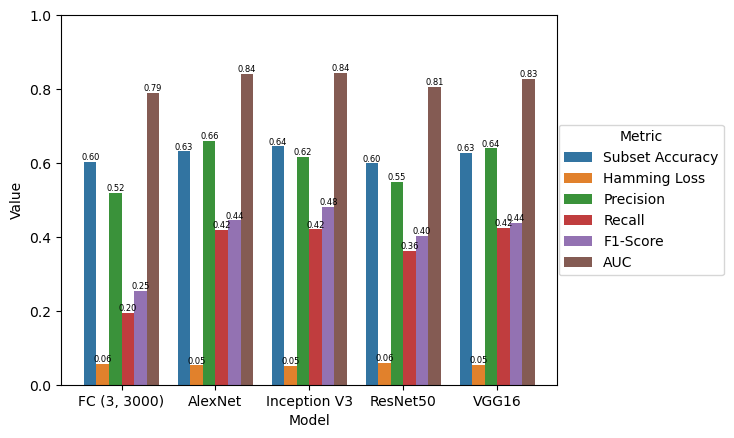

In [5]:
# plt.figure(figsize=(16,9))
ax = sns.barplot(x="Model", y="Value", hue="Metric", data=df_melt)
ax.set_ylim(0.0, 1.0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=6)
# ax.legend(loc='best', fontsize=25)
sns.move_legend(ax, "right", bbox_to_anchor=(1.35, 0.5))
plt.plot()
# Save figure as PDF
plt.savefig("figures/experiment_results.pdf", bbox_inches='tight')

In [6]:
data = [
    ["FC (3, 3000)", 1e-5, "F1-score", 0.6585, 0.3133, 0.0000, 0.0000, 0.3774, 0.0000, 0.0000, 0.0000, 0.0743,],
    ["FC (3, 3000)", 1e-5, "AUC", 0.9455, 0.8720, 0.8512, 0.6158, 0.8189, 0.6795, 0.6342, 0.6815, 0.7101,],
    ["AlexNet", 1e-5, "F1-score", 0.7435, 0.6096, 0.0323, 0.0095, 0.4851, 0.0000, 0.0214, 0.0846, 0.4351,],
    ["AlexNet", 1e-5, "AUC", 0.9763, 0.9435, 0.9405, 0.6459, 0.8486, 0.6754, 0.6918, 0.7199, 0.7837,],
    ["Inception V3", 1e-4, "F1-score", 0.7404, 0.6246, 0.1085, 0.0994, 0.4974, 0.0000, 0.1223, 0.1020, 0.5077,],
    ["Inception V3", 1e-4, "AUC", 0.9752, 0.9413, 0.9352, 0.6685, 0.8494, 0.6937, 0.7078, 0.7114, 0.7911,],
    ["ResNet50", 1e-4, "F1-score", 0.6688, 0.5728, 0.0709, 0.1441, 0.4173, 0.0000, 0.0072, 0.0320, 0.3928,],
    ["ResNet50", 1e-4, "AUC", 0.9541, 0.9237, 0.9275, 0.6463, 0.8224, 0.6609, 0.6562, 0.6690, 0.7253,],
    ["VGG16", 1e-4, "F1-score", 0.7509, 0.6099, 0.0000, 0.0280, 0.5312, 0.0000, 0.0283, 0.0338, 0.3819,],
    ["VGG16", 1e-4, "AUC", 0.9761, 0.9327, 0.9339, 0.6287, 0.8479, 0.5502, 0.5989, 0.6664, 0.7854,],
]
df = pd.DataFrame(data, columns=["Model", "Learning Rate", "Metric", "Cleaning", "Speech", "Feeding", "Others (H)", "Stress", "Disputes", "Cough", "Sneeze", "Others (A)"])
df = df.set_index(["Model", "Learning Rate", "Metric"])
df_melt = df.reset_index().melt(id_vars=["Model", "Learning Rate", "Metric"], value_vars=["Cleaning", "Speech", "Feeding", "Others (H)", "Stress", "Disputes", "Cough", "Sneeze", "Others (A)"], var_name="Label", value_name="Value")

In [7]:
df

Cleaning  Speech  Feeding  Others (H)  \
Model        Learning Rate Metric                                            
FC (3, 3000) 0.00001       F1-score    0.6585  0.3133   0.0000      0.0000   
                           AUC         0.9455  0.8720   0.8512      0.6158   
AlexNet      0.00001       F1-score    0.7435  0.6096   0.0323      0.0095   
                           AUC         0.9763  0.9435   0.9405      0.6459   
Inception V3 0.00010       F1-score    0.7404  0.6246   0.1085      0.0994   
                           AUC         0.9752  0.9413   0.9352      0.6685   
ResNet50     0.00010       F1-score    0.6688  0.5728   0.0709      0.1441   
                           AUC         0.9541  0.9237   0.9275      0.6463   
VGG16        0.00010       F1-score    0.7509  0.6099   0.0000      0.0280   
                           AUC         0.9761  0.9327   0.9339      0.6287   

                                     Stress  Disputes   Cough  Sneeze  \
Model        Learning Rate Metric                                       
FC (3, 3000) 0.00001       F1-score  0.3774    0.0000  0.0000  0.0000   
                           AUC       0.8189    0.6795  0.6342  0.6815   
AlexNet      0.00001       F1-score  0.4851    0.0000  0.0214  0.0846   
                           AUC       0.8486    0.6754  0.6918  0.7199   
Inception V3 0.00010       F1-score  0.4974    0.0000  0.1223  0.1020   
                           AUC       0.8494    0.6937  0.7078  0.7114   
ResNet50     0.00010       F1-score  0.4173    0.0000  0.0072  0.0320   
                           AUC       0.8224    0.6609  0.6562  0.6690   
VGG16        0.00010       F1-score  0.5312    0.0000  0.0283  0.0338   
                           AUC       0.8479    0.5502  0.5989  0.6664   

                                     Others (A)  
Model        Learning Rate Metric                
FC (3, 3000) 0.00001       F1-score      0.0743  
                           AUC           0.7101  
AlexNet      0.00001       F1-score      0.4351  
                           AUC           0.7837  
Inception V3 0.00010       F1-score      0.5077  
                           AUC           0.7911  
ResNet50     0.00010       F1-score      0.3928  
                           AUC           0.7253  
VGG16        0.00010       F1-score      0.3819  
                           AUC           0.7854

In [8]:
# save df as csv
# decimal separator as comma
df.to_csv("figures/experiment_results_per_label_wide.csv", sep=";", decimal=",", float_format="%.4f")

In [9]:
df_melt

,Model,Learning Rate,Metric,Label,Value
0,"FC (3, 3000)",0.00001,F1-score,Cleaning,0.6585
1,"FC (3, 3000)",0.00001,AUC,Cleaning,0.9455
2,AlexNet,0.00001,F1-score,Cleaning,0.7435
3,AlexNet,0.00001,AUC,Cleaning,0.9763
4,Inception V3,0.00010,F1-score,Cleaning,0.7404
...,...,...,...,...,...
85,Inception V3,0.00010,AUC,Others (A),0.7911
86,ResNet50,0.00010,F1-score,Others (A),0.3928
87,ResNet50,0.00010,AUC,Others (A),0.7253
88,VGG16,0.00010,F1-score,Others (A),0.3819


In [10]:
# save df_melt as csv
# decimal separator as comma
df_melt.to_csv("figures/experiment_results_per_label.csv", sep=";", decimal=",", index=False)

[]

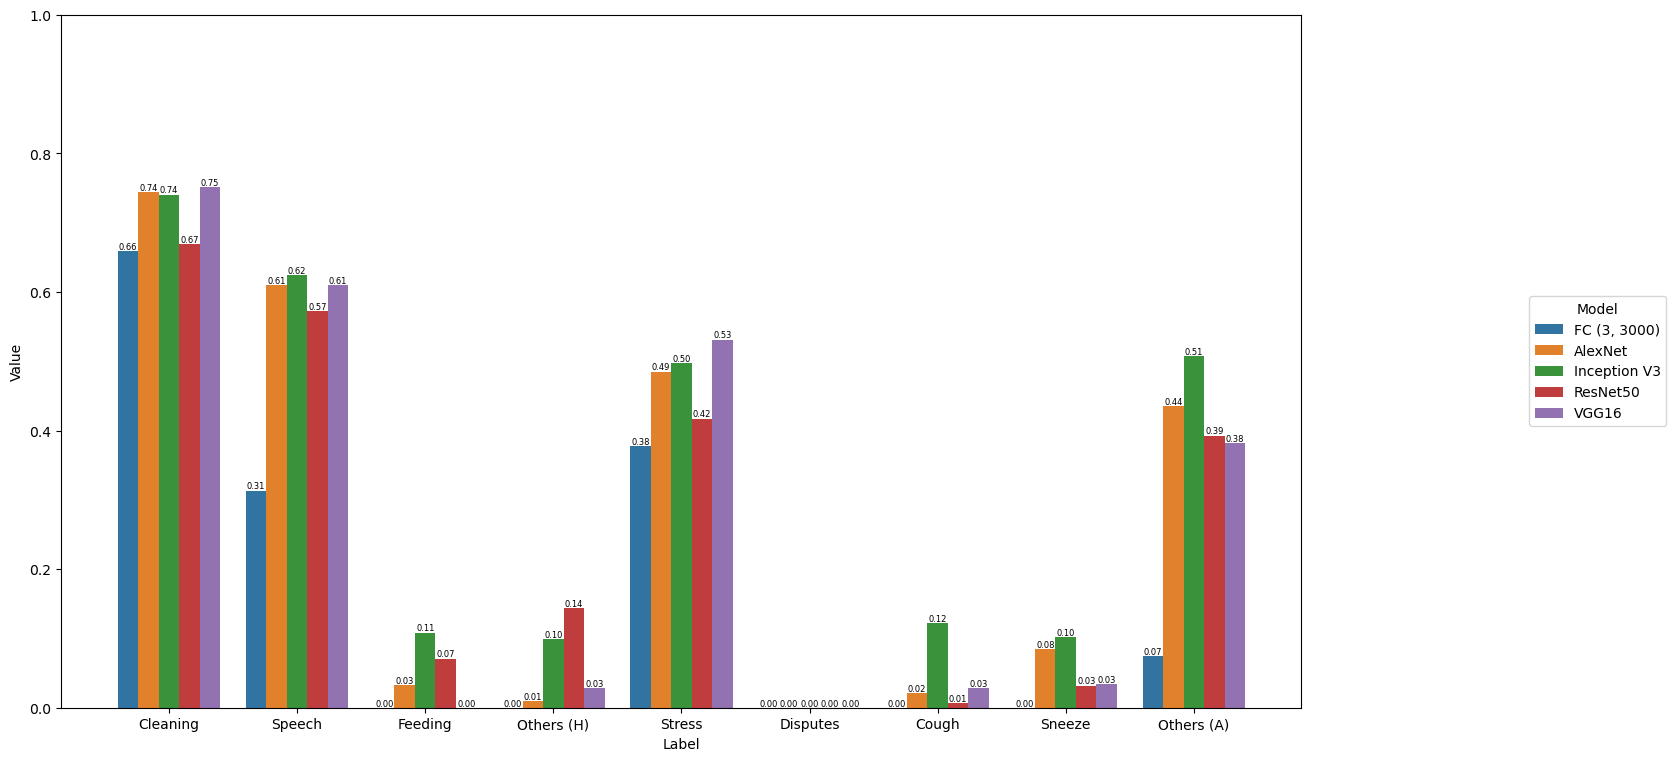

In [11]:
fig, ax = plt.subplots()
fig.set(figwidth=16, figheight=9)
sns.barplot(x="Label", y="Value", hue="Model", data=df_melt[df_melt["Metric"] == "F1-score"], ax=ax)
ax.set_ylim(0.0, 1.0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=6)
# ax.legend(loc='best', fontsize=25)
sns.move_legend(ax, "right", bbox_to_anchor=(1.3, 0.5))
plt.plot()

[]

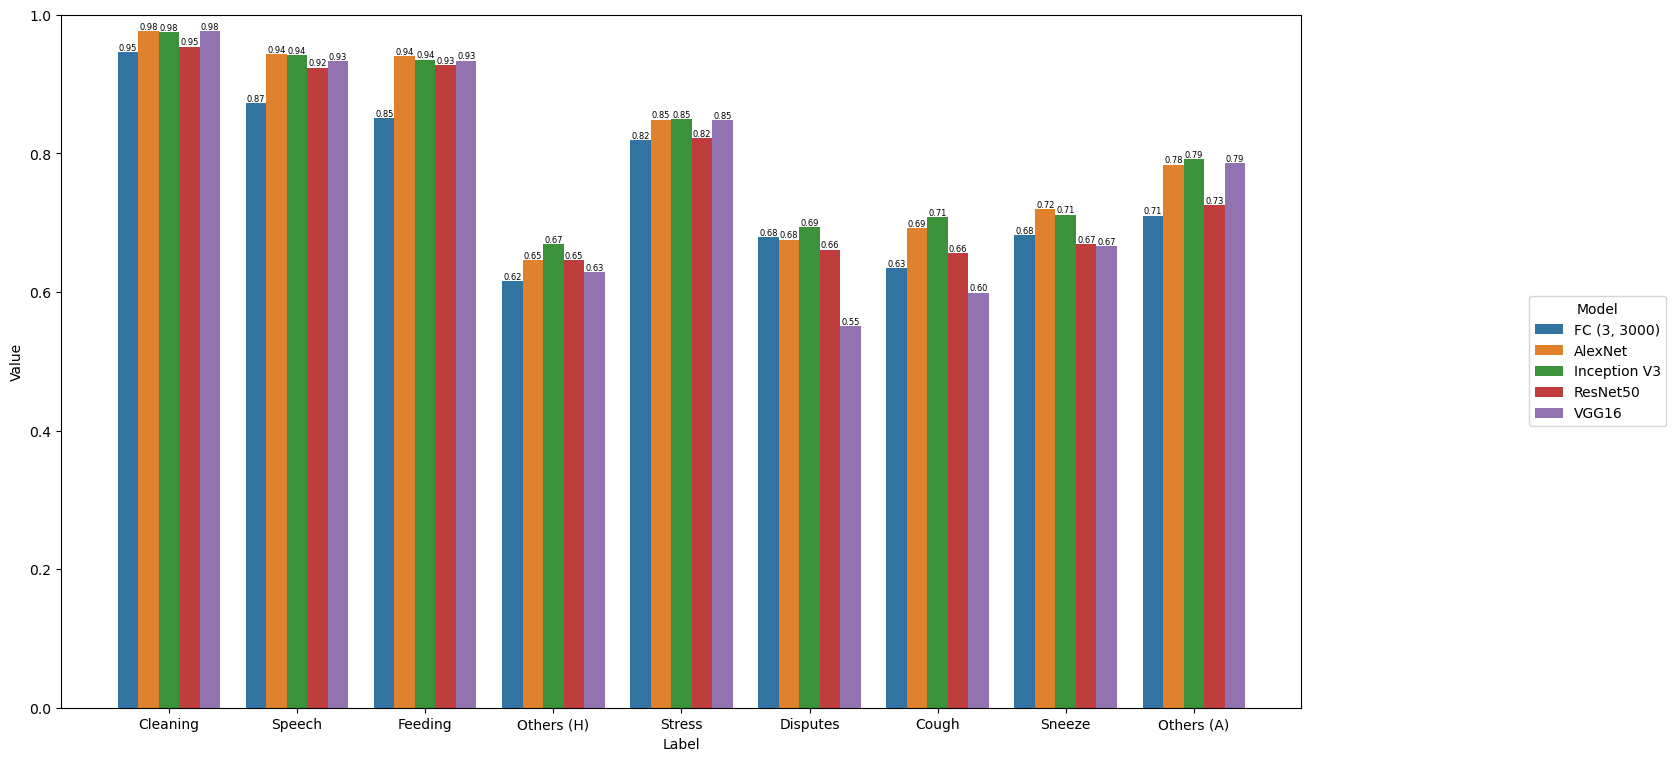

In [12]:
fig, ax = plt.subplots()
fig.set(figwidth=16, figheight=9)
sns.barplot(x="Label", y="Value", hue="Model", data=df_melt[df_melt["Metric"] == "AUC"], ax=ax)
ax.set_ylim(0.0, 1.0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=6)
# ax.legend(loc='best', fontsize=25)
sns.move_legend(ax, "right", bbox_to_anchor=(1.3, 0.5))
plt.plot()

In [13]:
df = pd.read_csv("30_09_2020_merged.csv")
df

,Timestamp,Duração,Limpeza de Baia,Fala Humana,Alimentação de Baias,OutrosH,EstresseDisputas,TosseEspirro,OutrosA
0,30/09/2020 00:00:00,5,False,False,False,False,False,False,False
1,30/09/2020 00:00:05,5,False,False,False,False,False,False,True
2,30/09/2020 00:00:10,5,False,False,False,False,False,False,True
3,30/09/2020 00:00:15,5,False,False,False,False,False,False,True
4,30/09/2020 00:00:20,5,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
11001,30/09/2020 15:16:45,5,False,False,False,False,False,False,True
11002,30/09/2020 15:16:50,5,False,False,False,False,False,False,False
11003,30/09/2020 15:16:55,5,False,False,False,False,False,False,False
11004,30/09/2020 15:17:00,5,False,False,False,False,False,False,False


In [14]:
data = [
        {"label": "Cleaning", "count": df.loc[df["Limpeza de Baia"]].count()[0]},
        {"label": "Speech", "count": df.loc[df["Fala Humana"]].count()[0]},
        {"label": "Feeding", "count": df.loc[df["Alimentação de Baias"]].count()[0]},
        {"label": "Others (H)", "count": df.loc[df["OutrosH"]].count()[0]},
        {"label": "Stress/Disputes", "count": df.loc[df["EstresseDisputas"]].count()[0]},
        {"label": "Cough/Sneeze", "count": df.loc[df["TosseEspirro"]].count()[0]},
        {"label": "Others (A)", "count": df.loc[df["OutrosA"]].count()[0]},
    ]
data = pd.DataFrame(data)
data["count_percentages"] = data["count"] / data["count"].sum()
data = data.set_index("label")
data

,count,count_percentages
label,,
Cleaning,903,0.130926
Speech,1267,0.183703
Feeding,170,0.024648
Others (H),333,0.048282
Stress/Disputes,1664,0.241264
Cough/Sneeze,836,0.121212
Others (A),1724,0.249964


[]

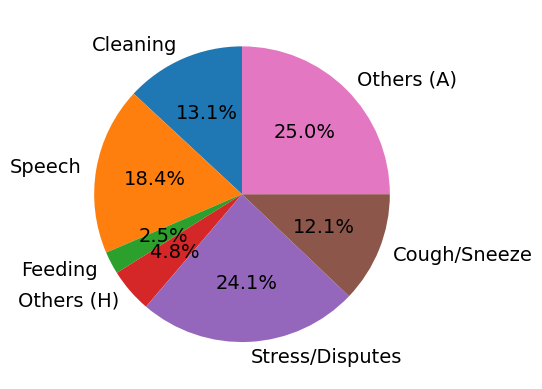

In [17]:
fig, ax = plt.subplots()
# Pie chart
labels = data.index
sizes = data["count_percentages"]
# larger font size
plt.rcParams.update({'font.size': 14})
# no explode
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Save figure as pdf
fig.savefig("figures/pie_chart_labels.pdf", bbox_inches='tight', transparent=True)
plt.plot()

[]

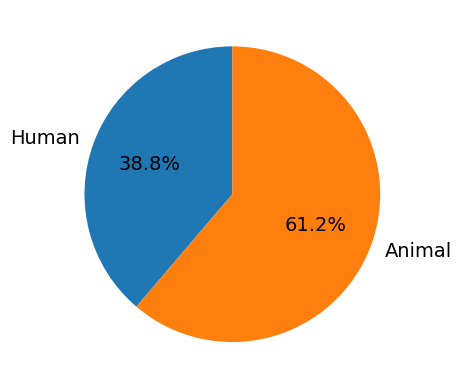

In [18]:
fig, ax = plt.subplots()
# group into human and animal
labels = ["Human", "Animal"]
# larger font size
plt.rcParams.update({'font.size': 14})
# 4 human, 5 animal
sizes = [
    data.loc[["Cleaning", "Speech", "Feeding", "Others (H)"], "count_percentages"].sum(),
    data.loc[["Stress/Disputes", "Cough/Sneeze", "Others (A)"], "count_percentages"].sum()
    ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Save figure as pdf
fig.savefig("figures/pie_chart_labels_human_animal.pdf", bbox_inches='tight', transparent=True)
plt.plot()